In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums_NEW_Alldata.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW ma_ntl_data_updatedsums_NEW_Alldata


meg = ma.copy()
meg = meg.drop([
    'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
       'State code','Village',
       'other_assembly_constituencies'
       ], axis=1)

meg = meg.rename(columns={'state_name': 'State', 'district_name': 'District','gp_name':'GP',
                                    'sub_district_name':'Subdistrict','village_name':'Village','block_name':'Block',
                                    'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                                    'block_code':'Block_code','gp_code':'GP_code','Village code':'Village_code'
                                    })

meg = meg.dropna(subset=['avg_ntl'])
meg = meg.dropna(subset=['total_population'])
# meg = meg[meg['total_population'] != 'Nava Mota']
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# Reset the index if needed
meg.reset_index(drop=True, inplace=True)
meg['total_population'] = meg['total_population'].astype(float)


In [4]:
# Calculate the mean of each column and store it in a new Series
averages = meg[[
    'total_population',
    # 'availability_of_farm_gate_processing', 
    # 'availability_of_food_storage_warehouse', 
    # 'availability_of_goatary_dev_project', 
    # 'availability_of_milk_routes', 
    # 'availability_of_pigery_development', 
    # 'availability_of_poultry_dev_project', 
    # 'is_common_pastures_available', 
    # 'is_fertilizer_shop_available', 
    # 'is_govt_seed_centre_available', 
    # 'availability_of_major_source_of_irrigation', 
    # 'availability_of_livestock_extension_services', 
    # 'is_soil_testing_centre_available',
    'availability_of_govt_degree_college',
    'availability_of_high_school',
    'availability_of_middle_school',
    'availability_of_primary_school',
    'availability_of_ssc_school',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_aanganwadi_centre_available',
    'is_veterinary_hospital_available',
    'availability_of_market',
    'availability_of_panchayat_bhawan',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_bank_available',
    'is_post_office_available',
    'is_village_connected_to_all_weather_road'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,availability_of_govt_degree_college,availability_of_high_school,availability_of_middle_school,availability_of_primary_school,availability_of_ssc_school,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,availability_of_mother_child_health_facilities,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_market,availability_of_panchayat_bhawan,availability_of_public_transport,availability_of_railway_station,is_bank_available,is_post_office_available,is_village_connected_to_all_weather_road
count,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000
mean,1851.11287,0.03186,0.20045,0.42758,0.81719,0.12175,0.12734,0.06615,0.33562,0.82861,0.11671,0.10535,0.45257,0.37833,0.02987,0.12716,0.24316,0.71877
std,3020.61676,0.17563,0.40034,0.49473,0.38651,0.32700,0.33336,0.24855,0.47221,0.37685,0.32107,0.30700,0.49775,0.48497,0.17024,0.33315,0.42899,0.44960
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,508.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1078.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,2131.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
max,99989.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [5]:
subset_df = meg[['Village_code', 'total_population']]

# subset_df.to_csv('/Users/sid/Desktop/vilpop.csv',index=False)

## Subdist Level

In [6]:
mer_sub = meg.groupby(['State','District','District_code','Subdistrict']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','SubDistrict Area':'mean'}).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','SubDistrict Area':'area',
                                  'road':'villages_road'})
mer_sub['subdist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_all_sub = pd.merge(meg, mer_sub, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']
mer_all_sub

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share
0,19,WEST BENGAL,319,MURSHIDABAD,2246,Bharatpur - II,3007,BHARATPUR-II,110579,SALAR,315742,Salar (CT),742401.00000,220.00000,1870.00000,99989.00000,52337.00000,47652.00000,19305.00000,11963.00000,7342.00000,1,0,1,0,250.00000,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,885.00000,1,1,0,0,1,1,1,1864.00000,35.00000,1,1,1,123.00000,1,1,1,1,0,1,1,2960.00000,1902.00000,1058.00000,1902.00000,13.00000,22.00000,48.00000,46.00000,5693.00000,2586.00000,14213.00000,1,1,2865.00000,2806.00000,Bharatpur - II,1.88623,8.72200,189.15200,4.87100,75.20000,8.62100,7,5,4,0,2,4,0.00075,935.45100,287650.00000,118,99,91,53,69,189.15200,0.00325,0.34761
1,19,WEST BENGAL,319,MURSHIDABAD,2246,Bharatpur - II,3007,BHARATPUR-II,110577,KAGRAM,315714,Kagram,742401.00000,220.00000,1870.00000,17000.00000,8550.00000,8450.00000,3920.00000,2025.00000,1895.00000,0,0,0,0,813.00000,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,2000.00000,1,1,0,0,1,1,1,1070.00000,32.00000,1,1,1,500.00000,0,0,1,1,0,1,1,115.00000,115.00000,105.00000,105.00000,0.00000,55.00000,105.00000,105.00000,55.00000,70.00000,2050.00000,1,0,115.00000,115.00000,Bharatpur - II,3.82485,13.17400,189.15200,4.87100,58.91000,4.47200,5,4,3,0,2,4,0.00347,935.45100,287650.00000,118,99,91,53,69,189.15200,0.00325,0.0

In [7]:

# Calculate the mean of each column and store it in a new Series
averages = mer_all_sub[['avg_ntl',
                          'area_sq_km',
                          'total_population',
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
avg_ntl              38.08397
area_sq_km            6.09153
total_population   1851.11287
dtype: float64


In [8]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road','area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
# filter_sub 

# Sorting on NTL_PC

In [9]:
sub_sorted = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [10]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = sub_sorted.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

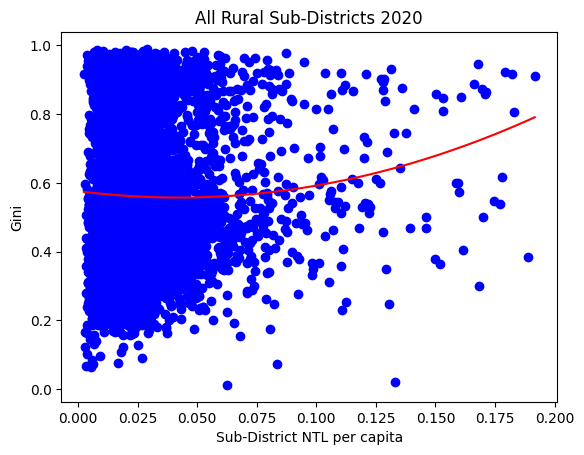

In [11]:
ale = ale2.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,0.105)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [12]:
panel_old = pd.merge(ale2, filter_sub, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


## WCV

In [106]:


# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['subdist_ntl_pc'].mean()
    numerator = (group['subdist_pop_share'] * ((group['ntl_pc'])**2)).sum()
    num = group['Max_Len'].max()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) /bar_y
    return pd.Series ([numerator, wcv,num])

wcv_old = sub_sorted.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_wcv).reset_index()
# Rename the columns for clarity
wcv_old.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'numer','WCV','num']

wcv_old

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pc,numer,WCV,num
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,0.03054,0.00135,1.20124,7.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,0.03839,0.01102,2.73488,32.00000
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,0.01325,0.00021,1.08800,27.00000
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,0.02999,0.01411,3.96067,44.00000
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,0.04021,0.06044,6.11458,46.00000
...,...,...,...,...,...,...,...,...,...,...
5785,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,0.01061,0.00015,1.16644,107.00000
5786,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,0.01695,0.00494,4.14631,105.00000
5787,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,0.01773,0.00075,1.54316,78.00000
5788,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,0.02901,0.00963,3.38207,89.00000


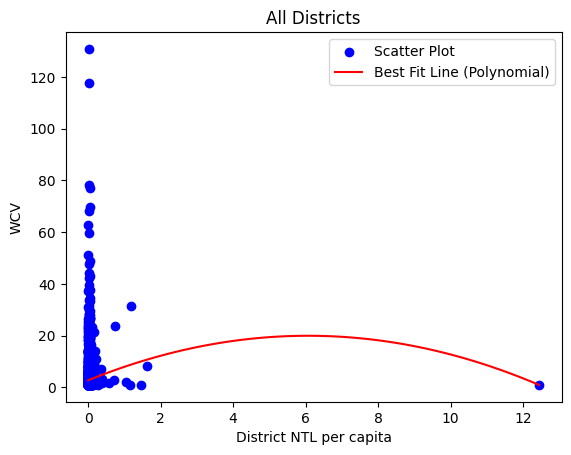

In [107]:
# wcv_old = wcv_old[wcv_old['subdist_ntl_pc'] <= 0.1]
# wcv_old = wcv_old[wcv_old['WCV'] <= 15]
# wcv_old = wcv_old[wcv_old['WCV'] > 0]

# Create a scatterplot
plt.scatter(wcv_old['subdist_ntl_pc'], wcv_old['WCV'], label='Scatter Plot', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv_old['subdist_ntl_pc'], wcv_old['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv_old['subdist_ntl_pc']), max(wcv_old['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()
# Display the plot
plt.show()


In [108]:
panel_old_w = pd.merge(wcv_old, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

## Theil

In [114]:
def calculate_theil(group):
    yi = group['ntl_pc']/group['subdist_ntl_pc']
    mu = (group['ntl_pc']*group['subdist_pop_share']).sum()
    t0 = mu/group['ntl_pc']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['subdist_pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)

thei = sub_sorted.groupby(['Subdistrict','District','District_code','State','subdist_ntl','subdist_population','subdist_ntl_pc',"Max_Len"]).apply(calculate_theil).reset_index()

thei.columns = ['Subdistrict','District','District_code','State','subdist_ntl',
               'subdist_population','subdist_ntl_pc','num','theil']

thei

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,subdist_ntl_pc,num,theil
0,A.Konduru,KRISHNA,510,ANDHRA PRADESH,2140.77000,48612.00000,0.04404,22,0.24781
1,ADILABAD URBAN,ADILABAD,501,TELANGANA,19.99900,538.00000,0.03717,1,0.00000
2,AHMEDGARH,SANGRUR,43,PUNJAB,2518.24500,110496.00000,0.02279,52,0.16276
3,AIDILABAD RURAL,ADILABAD,501,TELANGANA,1771.04700,32664.00000,0.05422,34,0.13790
4,AJJAMPURA,CHIKKAMAGALURU,532,KARNATAKA,2465.06900,99575.00000,0.02476,110,0.26391
...,...,...,...,...,...,...,...,...,...
5785,Ziradei,SIWAN,222,BIHAR,1773.49100,190483.00000,0.00931,79,0.10188
5786,annur,COIMBATORE,569,TAMIL NADU,4148.00800,180121.00000,0.02303,28,0.11111
5787,jamunaha,SHRAVASTI,181,UTTAR PRADESH,2152.30700,260405.00000,0.00827,90,0.12323
5788,madawara,LALITPUR,161,UTTAR PRADESH,2596.40500,155579.00000,0.01669,102,0.24911


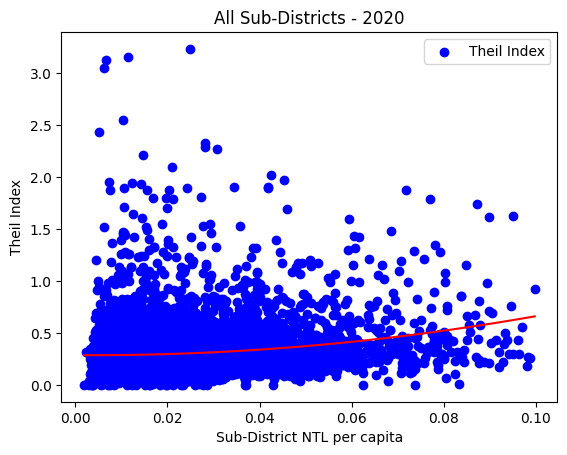

In [113]:
# thei = thei[thei['subdist_ntl_pc'] <= 0.1]
# Create a scatterplot
plt.scatter(thei['subdist_ntl_pc'], thei['theil'], label='Theil Index', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Theil Index")
plt.title("All Sub-Districts - 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(thei['subdist_ntl_pc'], thei['theil'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(thei['subdist_ntl_pc']), max(thei['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# plt.ylim(0, 1)

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [115]:
panel_old_t = pd.merge(thei, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

## Categories

In [13]:
df20 = sub_sorted.copy()
df20['str'] = df20['total_primary_school_students']/df20['total_primary_school_teachers']

In [14]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df20[df20['availability_of_primary_school'] < df20[selected_columns[1:]].max(axis=1)]


In [15]:
# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df20[selected_columns[1:]] = df20[selected_columns[1:]].where(
    df20[selected_columns[1:]].le(df20['availability_of_primary_school'], axis=0), 0
)

In [16]:
mer_cat_old = df20.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               'availability_of_mother_child_health_facilities':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()


In [17]:
panel_cat_old = pd.merge(panel_old, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old['no_1000s'] = panel_cat_old['subdist_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['subdist_edu_sum']/panel_cat_old['no_1000s']
panel_cat_old['adm_per_1000']= panel_cat_old['subdist_transportadmin_sum']/panel_cat_old['no_1000s']
panel_cat_old['arg_per_1000']= panel_cat_old['subdist_agro_sum']/panel_cat_old['no_1000s']
panel_cat_old['no_1000_students'] = panel_cat_old['total_primary_school_students']/1000
panel_cat_old['primaryschool_per_100']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000_students']


panel_cat_old['children_bw_0_6']= panel_cat_old['total_male_child_age_bw_0_6'] + panel_cat_old['total_female_child_age_bw_0_6']
panel_cat_old['med_per_1000']= panel_cat_old['subdist_med_sum']/panel_cat_old['no_1000s']
panel_cat_old['phc_per_1000']= panel_cat_old['availability_of_phc_chc']/panel_cat_old['no_1000s']
panel_cat_old['mchc_per_1000']= panel_cat_old['availability_of_mother_child_health_facilities']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['is_veterinary_hospital_available']/panel_cat_old['no_1000s']
panel_cat_old['no_100_kids'] = panel_cat_old['children_bw_0_6']/100
panel_cat_old['no_100_kids_reg'] = panel_cat_old['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old['aanganwadi_per_100']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids']
panel_cat_old['aanganwadi_per_100_reg']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids_reg']

panel_cat_old['share_roads'] = panel_cat_old['is_village_connected_to_all_weather_road']/panel_cat_old['num']
panel_cat_old['share_rails'] = panel_cat_old['availability_of_railway_station']/panel_cat_old['num']
panel_cat_old['share_pubtn'] = panel_cat_old['availability_of_public_transport']/panel_cat_old['num']
panel_cat_old['ps_share_elec'] = panel_cat_old['is_primary_school_with_electricity']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_toil'] = panel_cat_old['primary_school_toilet']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_clab'] = panel_cat_old['is_primary_school_with_computer_lab']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_play'] = panel_cat_old['is_primary_school_with_playground']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_dwat'] = panel_cat_old['is_primary_school_have_drinking_water']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_meal'] = panel_cat_old['availability_of_mid_day_meal_scheme']/panel_cat_old['availability_of_primary_school']
						


In [148]:
panel_cat_old_w = pd.merge(panel_old_w, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old_w['no_1000s'] = panel_cat_old_w['subdist_population']/1000

panel_cat_old_w['edu_per_1000']= panel_cat_old_w['subdist_edu_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['adm_per_1000']= panel_cat_old_w['subdist_transportadmin_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['arg_per_1000']= panel_cat_old_w['subdist_agro_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['no_1000_students'] = panel_cat_old_w['total_primary_school_students']/1000
panel_cat_old_w['primaryschool_per_100']= panel_cat_old_w['availability_of_primary_school']/panel_cat_old_w['no_1000_students']


panel_cat_old_w['children_bw_0_6']= panel_cat_old_w['total_male_child_age_bw_0_6'] + panel_cat_old_w['total_female_child_age_bw_0_6']
panel_cat_old_w['med_per_1000']= panel_cat_old_w['subdist_med_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['phc_per_1000']= panel_cat_old_w['availability_of_phc_chc']/panel_cat_old_w['no_1000s']
panel_cat_old_w['veter_per_1000'] = panel_cat_old_w['is_veterinary_hospital_available']/panel_cat_old_w['no_1000s']
panel_cat_old_w['no_100_kids'] = panel_cat_old_w['children_bw_0_6']/100
panel_cat_old_w['no_100_kids_reg'] = panel_cat_old_w['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old_w['aanganwadi_per_100']= panel_cat_old_w['is_aanganwadi_centre_available']/panel_cat_old_w['no_100_kids']
panel_cat_old_w['aanganwadi_per_100_reg']= panel_cat_old_w['is_aanganwadi_centre_available']/panel_cat_old_w['no_100_kids_reg']

panel_cat_old_w['share_roads'] = panel_cat_old_w['is_village_connected_to_all_weather_road']/panel_cat_old_w['num']
panel_cat_old_w['share_rails'] = panel_cat_old_w['availability_of_railway_station']/panel_cat_old_w['num']
panel_cat_old_w['share_pubtn'] = panel_cat_old_w['availability_of_public_transport']/panel_cat_old_w['num']
panel_cat_old_w['ps_share_elec'] = panel_cat_old_w['is_primary_school_with_electricity']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_toil'] = panel_cat_old_w['primary_school_toilet']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_clab'] = panel_cat_old_w['is_primary_school_with_computer_lab']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_play'] = panel_cat_old_w['is_primary_school_with_playground']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_dwat'] = panel_cat_old_w['is_primary_school_have_drinking_water']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_meal'] = panel_cat_old_w['availability_of_mid_day_meal_scheme']/panel_cat_old_w['availability_of_primary_school']
						

In [149]:
panel_cat_old_t = pd.merge(panel_old_t, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old_t['no_1000s'] = panel_cat_old_t['subdist_population']/1000

panel_cat_old_t['edu_per_1000']= panel_cat_old_t['subdist_edu_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['adm_per_1000']= panel_cat_old_t['subdist_transportadmin_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['arg_per_1000']= panel_cat_old_t['subdist_agro_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['no_1000_students'] = panel_cat_old_t['total_primary_school_students']/1000
panel_cat_old_t['primaryschool_per_100']= panel_cat_old_t['availability_of_primary_school']/panel_cat_old_t['no_1000_students']


panel_cat_old_t['children_bw_0_6']= panel_cat_old_t['total_male_child_age_bw_0_6'] + panel_cat_old_t['total_female_child_age_bw_0_6']
panel_cat_old_t['med_per_1000']= panel_cat_old_t['subdist_med_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['phc_per_1000']= panel_cat_old_t['availability_of_phc_chc']/panel_cat_old_t['no_1000s']
panel_cat_old_t['veter_per_1000'] = panel_cat_old_t['is_veterinary_hospital_available']/panel_cat_old_t['no_1000s']
panel_cat_old_t['no_100_kids'] = panel_cat_old_t['children_bw_0_6']/100
panel_cat_old_t['no_100_kids_reg'] = panel_cat_old_t['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old_t['aanganwadi_per_100']= panel_cat_old_t['is_aanganwadi_centre_available']/panel_cat_old_t['no_100_kids']
panel_cat_old_t['aanganwadi_per_100_reg']= panel_cat_old_t['is_aanganwadi_centre_available']/panel_cat_old_t['no_100_kids_reg']

panel_cat_old_t['share_roads'] = panel_cat_old_t['is_village_connected_to_all_weather_road']/panel_cat_old_t['num']
panel_cat_old_t['share_rails'] = panel_cat_old_t['availability_of_railway_station']/panel_cat_old_t['num']
panel_cat_old_t['share_pubtn'] = panel_cat_old_t['availability_of_public_transport']/panel_cat_old_t['num']
panel_cat_old_t['ps_share_elec'] = panel_cat_old_t['is_primary_school_with_electricity']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_toil'] = panel_cat_old_t['primary_school_toilet']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_clab'] = panel_cat_old_t['is_primary_school_with_computer_lab']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_play'] = panel_cat_old_t['is_primary_school_with_playground']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_dwat'] = panel_cat_old_t['is_primary_school_have_drinking_water']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_meal'] = panel_cat_old_t['availability_of_mid_day_meal_scheme']/panel_cat_old_t['availability_of_primary_school']
						

In [150]:

# Calculate the mean of each column and store it in a new Series
averages = panel_cat_old[['subdist_ntl',
                          'subdist_population',
                          'subdist_ntl_pc',
                          'alesina',
                          'num'
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
subdist_ntl            3379.39343
subdist_population   164602.71554
subdist_ntl_pc            0.03112
alesina                   0.55574
num                      88.79016
dtype: float64


# Sorting with NTL_PA

In [162]:
sub_sorted_area = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pa'])
# sub_sorted_area['Index'] = sub_sorted_area.groupby('Subdistrict').cumcount() + 1
sub_sorted_area['Index'] = sub_sorted_area.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted_area['Max_Len'] = sub_sorted_area.groupby(['State','District','Subdistrict'])['Index'].transform('max')
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
# sub_sorted_area['Max_Len'] = sub_sorted_area.groupby('Subdistrict')['Index'].transform('max')

In [163]:
# Filter villges with extremely small area
sub_sorted_area = sub_sorted_area[sub_sorted_area['area_sq_km'] > 1]
sub_sorted_area

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share,Index,Max_Len
47839,35,ANDAMAN AND NICOBAR ISLANDS,603,NICOBARS,5918,Great Nicobar,6498,CAMPBELL BAY,234531,LAXMINAGAR,645194,Vijoy Nagar,744302.00000,543.00000,NaN,354.00000,171.00000,183.00000,119.00000,80.00000,28.00000,0,0,0,0,197.59000,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,88.00000,1,1,0,0,1,1,1,50.00000,4.00000,1,1,1,0.00000,0,0,0,0,0,1,1,24.00000,24.00000,1.00000,24.00000,0.00000,1.00000,0.00000,4.00000,12.00000,12.00000,23.00000,0,0,24.00000,24.00000,Great Nicobar,1.73359,7.33300,1117.28700,1.37700,14.39800,1.96300,4,4,1,0,2,2,0.04067,182.73600,5983.00000,30,10,19,14,14,1117.28700,0.03054,0.05917,1,7
47838,35,ANDAMAN AND NICOBAR ISLANDS,603,NICOBARS,5918,Great Nicobar,6498,CAMPBELL BAY,234531,LAXMINAGAR,645191,Sastri Nagar,744302.00000,543.00000,NaN,253.00000,126.00000,127.00000,74.00000,48.00000,0.00000,0,0,0,0,208.86000,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,54.00000,1,1,0,0,0,1,1,16.00000,2.00000,0,0,0,0.00000,0,0,0,0,0,1,1,6.00000,6.00000,0.00000,6.00000,0.00000,0.00000,0.00000,0.00000,4.00000,4.00000,8.00000,0,0,6.00000,6.00000,Great Nicobar,1.73359,4.25100,1117.28700,1.37700,9.91300,2.33200,5,1,1,0,2,1,0.03918,182.73600,5983.00000,30,10,19,14,14,1117.28700,0.03054,0.04229,2,7
47836,35,ANDAMAN AND NICOBAR

In [164]:
def calculate_alesina_area(group):
    sum_y = group['ntl_pa'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pa'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# Calculate WCV for each state using groupby and apply
all = sub_sorted_area.groupby(['State','District','District_code',
                               'Subdistrict',
                               'subdist_ntl','subdist_population',
                               'subdist_ntl_pa'
                          ]).apply(calculate_alesina_area).reset_index()

# Reset the index and rename the result column
all.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pa',
               'sum_y','numerator', 'num','alesina']
all

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,1.37700,26.04600,75.32200,7.00000,0.31660
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,1.89300,169.46500,1597.77800,32.00000,0.44198
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,2.53500,103.43000,1378.08500,27.00000,0.05009
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,1.67700,150.45900,2829.42100,44.00000,0.16794
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,2.04300,252.67500,4406.93600,46.00000,0.26343
...,...,...,...,...,...,...,...,...,...,...,...
6120,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,5.59300,615.80500,26925.09100,107.00000,0.19209
6121,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,9.67300,885.09600,31487.25400,105.00000,0.33191
6122,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,8.06300,544.94100,18683.18500,78.00000,0.13372
6123,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,17.12800,1553.64700,34887.23800,89.00000,0.50663


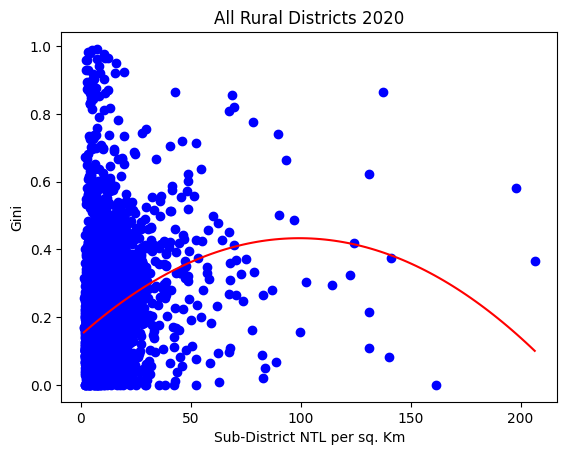

In [165]:
all['alesina'] = all['alesina'].abs()
# all = all[all['subdist_ntl_pa'] < 60]
# all = all[all['alesina'] > 0]
# all = all[all['num']>10]
# ale = ale[ale['alesina'] < 1]


# Create a scatterplot
plt.scatter(all['subdist_ntl_pa'], all['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per sq. Km")
plt.ylabel("Gini")
plt.title("All Rural Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(all['subdist_ntl_pa'], all['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(all['subdist_ntl_pa']), max(all['subdist_ntl_pa']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,20)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [166]:
panel = pd.merge(all, filter_sub, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]

panel

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,1.37700,26.04600,75.32200,7.00000,0.31660,30,10,19,14,14,1117.28700
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,1.89300,169.46500,1597.77800,32.00000,0.44198,161,81,59,43,50,1025.74900
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,2.53500,103.43000,1378.08500,27.00000,0.05009,80,62,42,43,38,198.20200
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,1.67700,150.45900,2829.42100,44.00000,0.16794,127,94,82,58,69,1727.48000
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,2.04300,252.67500,4406.93600,46.00000,0.26343,137,100,71,57,87,1147.66100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,5.59300,615.80500,26925.09100,107.00000,0.19209,440,243,232,131,162,320.98800
6126,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,9.67300,885.09600,31487.25400,105.00000,0.33191,133,147,196,87,159,335.55100
6127,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,8.06300,544.94100,18683.18500,78.00000,0.13372,107,109,100,26,106,215.17700
6128,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,17.12800,1553.64700,34887.23800,89.00000,0.50663,225,139,120,58,95,219.37700


## WCV

In [167]:


# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['subdist_ntl_pa'].mean()
    numerator = (group['subdist_pop_share'] * ((group['ntl_pa'])**2)).sum()
    num = group['Max_Len'].max()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) /bar_y
    return pd.Series ([numerator, wcv,num])


wcv = sub_sorted_area.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pa']).apply(calculate_wcv).reset_index()
# Rename the columns for clarity
wcv.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pa',
               'numer','WCV','num']

wcv

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,numer,WCV,num
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,1.37700,41.36771,4.67086,7.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,1.89300,99.02536,5.25681,32.00000
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,2.53500,23.12160,1.89684,27.00000
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,1.67700,24.63847,2.95988,44.00000
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,2.04300,97.26337,4.82732,46.00000
...,...,...,...,...,...,...,...,...,...,...
6120,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,5.59300,71.69921,1.51395,107.00000
6121,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,9.67300,209.29729,1.49562,105.00000
6122,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,8.06300,82.92770,1.12941,78.00000
6123,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,17.12800,865.91857,1.71803,89.00000


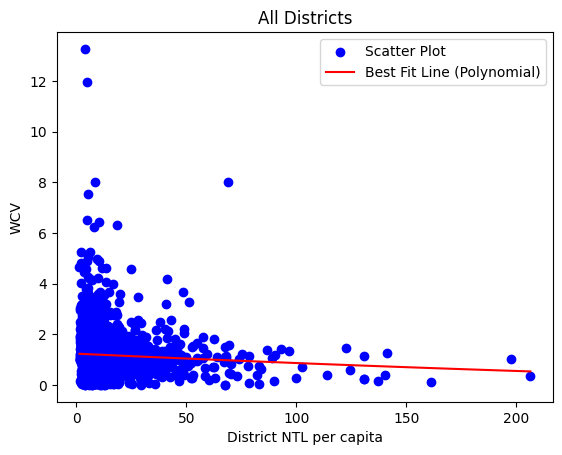

In [168]:
# wcvc = wcvc[wcvc['dist_ntl_pc'] <= 0.1]
# wcvc = wcvc[wcvc['WCV'] <= 15]
# wcvc = wcvc[wcvc['WCV'] > 0]

# Create a scatterplot
plt.scatter(wcv['subdist_ntl_pa'], wcv['WCV'], label='Scatter Plot', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv['subdist_ntl_pa'], wcv['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv['subdist_ntl_pa']), max(wcv['subdist_ntl_pa']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()
# Display the plot
plt.show()


In [169]:
panel_w = pd.merge(wcv, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

# panel_w.to_csv('/Users/sid/Desktop/panel_WCV_2020.csv',index=False)


## Theil

In [171]:
def calculate_theil(group):
    yi = group['ntl_pa']/group['subdist_ntl_pa']
    mu = (group['ntl_pa']*group['subdist_pop_share']).sum()
    t0 = mu/group['ntl_pa']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['subdist_pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)

thei = sub_sorted.groupby(['State','District','District_code','Subdistrict',
                           'subdist_ntl','subdist_population','subdist_ntl_pa',
                           "Max_Len"
                           ]).apply(calculate_theil).reset_index()


# Rename the columns for clarity
thei.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pa',
               'num','theil']

thei

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,num,theil
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,1.37700,7,0.26287
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,1.89300,32,0.39302
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,2.53500,27,0.31570
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,1.67700,44,0.11610
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,2.04300,46,0.29136
...,...,...,...,...,...,...,...,...,...
6138,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,5.59300,107,8.59103
6139,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,9.67300,105,0.26950
6140,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,8.06300,78,0.09011
6141,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,17.12800,89,5.94506


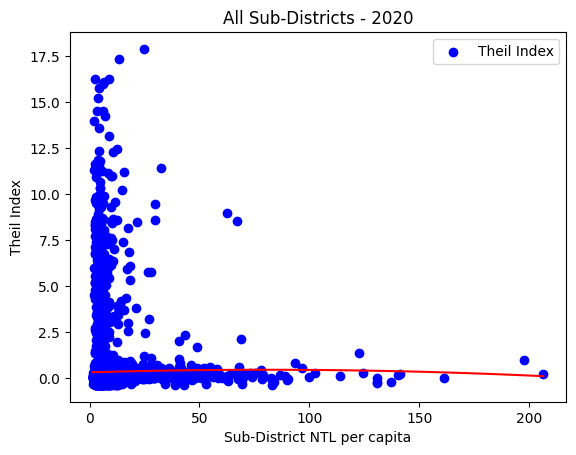

In [172]:
# thei = thei[thei['subdist_ntl_pa'] <= 0.1]
# thei = thei[thei['theil']<3]
# thei = thei[thei['theil']>0]
# Create a scatterplot
plt.scatter(thei['subdist_ntl_pa'], thei['theil'], label='Theil Index', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Theil Index")
plt.title("All Sub-Districts - 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(thei['subdist_ntl_pa'], thei['theil'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(thei['subdist_ntl_pa']), max(thei['subdist_ntl_pa']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# plt.ylim(0, 1)

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [173]:
panel_t = pd.merge(thei, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

# panel_w.to_csv('/Users/sid/Desktop/panel_WCV_2020.csv',index=False)


## Categories

In [174]:

# Calculate the mean of each column and store it in a new Series
averages = sub_sorted_area[['availability_of_farm_gate_processing', 
               'availability_of_food_storage_warehouse', 
               'availability_of_goatary_dev_project', 
               'availability_of_milk_routes', 
               'availability_of_pigery_development', 
               'availability_of_poultry_dev_project', 
               'is_common_pastures_available', 
               'is_fertilizer_shop_available', 
               'is_govt_seed_centre_available', 
               'availability_of_major_source_of_irrigation', 
               'availability_of_livestock_extension_services', 
               'is_soil_testing_centre_available',
                'availability_of_govt_degree_college',
                    'availability_of_high_school',
                    'availability_of_middle_school',
                    'availability_of_primary_school',
                    'availability_of_ssc_school',
                    'availability_of_phc_chc',
                    'availability_of_jan_aushadhi_kendra',
                    'availability_of_mother_child_health_facilities',
                    'is_aanganwadi_centre_available',
                    'is_veterinary_hospital_available',
                    'availability_of_market',
                    'availability_of_panchayat_bhawan',
                    'availability_of_public_transport',
                    'availability_of_railway_station',
                    'is_bank_available',
                    'is_post_office_available'
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
availability_of_farm_gate_processing             0.11491
availability_of_food_storage_warehouse           0.08563
availability_of_goatary_dev_project              0.13986
availability_of_milk_routes                      0.20922
availability_of_pigery_development               0.05128
availability_of_poultry_dev_project              0.13774
is_common_pastures_available                     0.25794
is_fertilizer_shop_available                     0.17662
is_govt_seed_centre_available                    0.10193
availability_of_major_source_of_irrigation       0.24483
availability_of_livestock_extension_services     0.28714
is_soil_testing_centre_available                 0.04288
availability_of_govt_degree_college              0.03401
availability_of_high_school                      0.22328
availability_of_middle_school                    0.46775
availability_of_primary_school                   0.86641
availability_of_ssc_school                       0.13481
availab

In [175]:
df21 = sub_sorted_area.copy()
df21['str'] = df21['total_primary_school_students']/df21['total_primary_school_teachers']

df21

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share,Index,Max_Len,str
47839,35,ANDAMAN AND NICOBAR ISLANDS,603,NICOBARS,5918,Great Nicobar,6498,CAMPBELL BAY,234531,LAXMINAGAR,645194,Vijoy Nagar,744302.00000,543.00000,NaN,354.00000,171.00000,183.00000,119.00000,80.00000,28.00000,0,0,0,0,197.59000,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,88.00000,1,1,0,0,1,1,1,50.00000,4.00000,1,1,1,0.00000,0,0,0,0,0,1,1,24.00000,24.00000,1.00000,24.00000,0.00000,1.00000,0.00000,4.00000,12.00000,12.00000,23.00000,0,0,24.00000,24.00000,Great Nicobar,1.73359,7.33300,1117.28700,1.37700,14.39800,1.96300,4,4,1,0,2,2,0.04067,182.73600,5983.00000,30,10,19,14,14,1117.28700,0.03054,0.05917,1,7,12.50000
47838,35,ANDAMAN AND NICOBAR ISLANDS,603,NICOBARS,5918,Great Nicobar,6498,CAMPBELL BAY,234531,LAXMINAGAR,645191,Sastri Nagar,744302.00000,543.00000,NaN,253.00000,126.00000,127.00000,74.00000,48.00000,0.00000,0,0,0,0,208.86000,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,54.00000,1,1,0,0,0,1,1,16.00000,2.00000,0,0,0,0.00000,0,0,0,0,0,1,1,6.00000,6.00000,0.00000,6.00000,0.00000,0.00000,0.00000,0.00000,4.00000,4.00000,8.00000,0,0,6.00000,6.00000,Great Nicobar,1.73359,4.25100,1117.28700,1.37700,9.91300,2.33200,5,1,1,0,2,1,0.03918,182.73600,5983.00000,30,10,19,14,14,1117.28700,0.03054,0.04229,2,7,8.00000
47836,3

In [176]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows = df21[df21['availability_of_primary_school'] < df21[selected_columns[1:]].max(axis=1)]

# Display the filtered rows
filtered_rows

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share,Index,Max_Len,str
47671,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,6492,DIGLIPUR,234476,SITANAGAR,645219,Krishnapuri (RV),744202.00000,543.00000,NaN,397.00000,206.00000,191.00000,92.00000,57.00000,18.00000,0,1,0,0,49.00000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0.00000,0,1,1,1,1,1,1,0.00000,0.00000,0,0,0,0.00000,0,0,0,0,0,1,1,15.00000,15.00000,14.00000,15.00000,0.00000,0.00000,0.00000,0.00000,17.00000,12.00000,11.00000,1,0,19.00000,19.00000,Little Andaman,NaN,5.31300,1025.74900,1.89300,12.66700,2.38400,1,0,2,0,1,0,0.03191,1470.68700,38310.00000,161,81,59,43,50,1025.74900,0.03839,0.01036,8,32,NaN
47677,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,6492,DIGLIPUR,234467,KERALAPURAM,645226,Keralapuram (RV),744202.00000,543.00000,NaN,537.00000,265.00000,272.00000,171.00000,121.00000,50.00000,1,1,0,1,52.60000,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,31.00000,0,1,1,1,1,1,1,0.00000,0.00000,0,1,0,0.00000,0,0,0,0,0,1,1,26.00000,26.00000,26.00000,26.00000,26.00000,4.00000,0.00000,2.00000,15.00000,11.00000,21.00000,0,1,26.00000,26.00000,Diglipur,3.03682,6.64700,1025.74900,1.89300,31.77200,4.78000,9,1,2,0,1,1,0.05917,1470.68700,38310.00000,161,81,59,43,50,1025.74900,0.03839,0

In [177]:
# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df21[selected_columns[1:]] = df21[selected_columns[1:]].where(
    df21[selected_columns[1:]].le(df21['availability_of_primary_school'], axis=0), 0
)

In [178]:
mer_cat = df21.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()
# mer_cat['avg_ntl'] = mer_cat['avg_ntl'].astype(float)
# mer_cat = mer_cat.rename(columns={'total_population': 'subdist_population',
#                                   'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum','transportadmin':'subdist_transportadmin_sum','area_sq_km':'subdist_area'})
# # mer_cat['dist_ntl_pc'] = mer_cat['subdist_ntl']/mer_cat['subdist_population']
# mer_all_cat = pd.merge(df21, mer_cat, on=['Subdistrict','District','District_code','State'], how='outer')
# mer_all_cat['pop_share'] = mer_all_cat['subdist_population']/mer_all_cat['subdist_population']
mer_cat

,Subdistrict,District,District_code,State,total_population,agro,med,edu,transportadmin,area_sq_km,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str
0,A.Konduru,KRISHNA,510,ANDHRA PRADESH,48612.00000,66,52,42,35,557.73900,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,15,2423.00000,1310.00000,1288.00000,4.39133,26.43259
1,ADILABAD URBAN,ADILABAD,501,TELANGANA,538.00000,1,1,1,1,3.81000,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,0,39.00000,27.00000,15.00000,4.59984,6.33333
2,AHMEDGARH,SANGRUR,43,PUNJAB,110496.00000,429,188,171,175,287.55200,18199.00000,2191.00000,51,16,51,52,51,0,37,46,49,39,4522.00000,578.00000,38,38,37,6,38,30,49,41,28,2576.00000,2100.00000,2244.00000,1.08667,11.77535
3,AIDILABAD RURAL,ADILABAD,501,TELANGANA,32664.00000,36,46,56,23,403.96700,7951.00000,5591.00000,23,0,11,32,29,3,4,22,27,31,2438.00000,127.00000,13,7,4,0,1,0,31,1,29,2368.00000,1287.00000,1345.00000,3.11010,20.39735
4,AJJAMPURA,CHIKKAMAGALURU,532,KARNATAKA,94104.00000,150,156,169,56,501.28500,21295.00000,16224.00000,84,1,56,92,92,2,10,68,92,89,3926.00000,316.00000,47,18,12,0,9,2,94,13,99,3539.00000,1937.00000,2062.00000,16.90056,10.53655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5780,Ziradei,SIWAN,222,BIHAR,164626.00000,43,66,95,49,131.98400,26777.00000,17227.00000,32,1,3,44,30,7,1,22,43,40,9696.00000,486.00000,35,10,4,2,6,1,52,2,18,8442.00000,6258.00000,5700.00000,2.91019,27.38352
5781,annur,COIMBATORE,569,TAMIL NADU,180121.00000,137,76,81,65,371.13700,53258.00000,7258.00000,23,5,26,26,25,2,11,23,25,25,4581.00000,245.00000,20,11,12,12,9,8,28,12,22,4812.00000,2797.00000,2516.00000,18.49640,17.22829
5782,jamunaha,SHRAVASTI,181,UTTAR PRADESH,250509.00000,135,133,153,106,320.16000,43565.00000,28868.00000,72,2,27,77,73,2,2,28,71,73,18621.00000,718.00000,50,11,11,4,11,9,71,6,74,15575.00000,8844.00000,8061.00000,16.16015,48.33408
5783,madawara,LALITPUR,161,UTTAR PRADESH,155579.00000,47,109,169,71,845.60000,28229.00000,23777.00000,71,0,32,91,84,1,4,47,89,91,13940.00000,334.00000,64,7,5,2,11,5,78,3,96,13565.00000,7499.00000,6590.00000,21.82249,56.28114


In [179]:
panel_cat = pd.merge(panel, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat = panel_cat[panel_cat['dist_ntl_pc'] <= 0.04]
# panel_cat = panel_cat[panel_cat['alesina'] > 0]

panel_cat_t = pd.merge(panel_t, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat_t = panel_cat_t[panel_cat_t['dist_ntl_pc'] <= 0.1]
# panel_cat_t = panel_cat_t[panel_cat_t['theil'] > 1]

panel_cat_w = pd.merge(panel_w, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat_w = panel_cat_w[panel_cat_w['dist_ntl_pc'] <= 0.1]
# # panel_cat_w = panel_cat_w[panel_cat_w['WCV'] > 1]
# panel_cat_w = panel_cat_w[panel_cat_w['WCV'] <= 15]

panel_cat

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,total_population,agro,med,edu,transportadmin,area_sq_km,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str
0,ANDHRA PRADESH,KRISHNA,510,A.Konduru,2140.77000,48612.00000,4.03000,95.03400,951.92200,22.00000,0.13485,66,52,42,35,35,220.11600,48612.00000,66,52,42,35,557.73900,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,15,2423.00000,1310.00000,1288.00000,4.39133,26.43259
1,TELANGANA,ADILABAD,501,ADILABAD URBAN,19.99900,538.00000,29.46500,5.25000,5.25000,1.00000,0.00000,1,1,1,1,1,40.50400,538.00000,1,1,1,1,3.81000,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,0,39.00000,27.00000,15.00000,4.59984,6.33333
2,PUNJAB,SANGRUR,43,AHMEDGARH,2518.24500,110496.00000,8.78700,532.93100,9236.02700,52.00000,0.35267,429,188,171,175,79,908.57500,110496.00000,429,188,171,175,287.55200,18199.00000,2191.00000,51,16,51,52,51,0,37,46,49,39,4522.00000,578.00000,38,38,37,6,38,30,49,41,28,2576.00000,2100.00000,2244.00000,1.08667,11.77535
3,TELANGANA,ADILABAD,501,AIDILABAD RURAL,1771.04700,32664.00000,4.59100,176.45900,2184.33300,34.00000,0.30125,36,46,56,23,52,331.20100,32664.00000,36,46,56,23,403.96700,7951.00000,5591.00000,23,0,11,32,29,3,4,22,27,31,2438.00000,127.00000,13,7,4,0,1,0,31,1,29,2368.00000,1287.00000,1345.00000,3.11010,20.39735
4,KARNATAKA,CHIKKAMAGALURU,532,AJJAMPURA,2465.06900,99575.00000,4.42200,388.90500,19070.66800,110.00000,0.11751,158,166,180,57,198,1059.17233,94104.00000,150,156,169,56,501.28500,21295.00000,16224.00000,84,1,56,92,92,2,10,68,92,89,3926.00000,316.00000,47,18,12,0,9,2,94,13,99,3539.00000,1937.00000,2062.00000,16.90056,10.53655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,UTTAR PRADESH,SHRAVASTI,181,jamunaha,2152.30700,260405.00000,6.57200,590.46000,24579.73200,90.00000,0.08604,146,137,161,110,158,324.30200,250509.00000,135,133,153,106,320.16000,43565.00000,28868.00000,72,2,27,77,73,2,2,28,71,73,18621.00000,718.00000,50,11,11,4,11,9,71,6,74,15575.00000,8844.00000,8061.00000,16.16015,48.33408
6121,UTTAR PRADESH,LALITPUR,161,madawara,2596.40500,155579.00000,3.01500,362.06800,16167.59700,102.00000,0.13425,47,109,169,71,167,845.59300,155579.00000,47,109,169,71,845.60000,28229.00000,23777.00000,71,0,32,91,84,1,4,47,89,91,13940.00000,334.00000,64,7,5,2,11,5,78,3,96,13565.00000,7499.00000,6590.00000,21.82249,56.28114
6122,TAMIL NADU,CUDDALORE,570,veppur,2346.75900,148747.00000,4.68600,4.68600,210.87000,55.00000,0.61818,186,85,98,81,91,803.34471,148747.00000,186,85,98,81,385.00500,36424.00000,15232.00000,49,3,40,50,50,7,18,42,49,49,4458.00000,175.00000,29,10,8,1,9,3,52,9,42,6489.00000,3497.00000,4215.00000,14.92153,26.82717
6123,TAMIL NADU,CUDDALORE,570,veppur,2346.75900,148747.00000,6.62000,103.23000,3188.67000,55.00000,0.10505,186,85,98,81,91,803.34471,148747.00000,186,85,98,81,385.00500,36424.00

In [180]:
panel_cat['no_1000s'] = panel_cat['subdist_population']/1000

panel_cat['edu_per_1000']= panel_cat['subdist_edu_sum']/panel_cat['no_1000s']
panel_cat['adm_per_1000']= panel_cat['subdist_transportadmin_sum']/panel_cat['no_1000s']
panel_cat['arg_per_1000']= panel_cat['subdist_agro_sum']/panel_cat['no_1000s']
panel_cat['no_1000_students'] = panel_cat['total_primary_school_students']/1000
panel_cat['primaryschool_per_100']= panel_cat['availability_of_primary_school']/panel_cat['no_1000_students']


panel_cat['children_bw_0_6']= panel_cat['total_male_child_age_bw_0_6'] + panel_cat['total_female_child_age_bw_0_6']
panel_cat['med_per_1000']= panel_cat['subdist_med_sum']/panel_cat['no_1000s']
panel_cat['phc_per_1000']= panel_cat['availability_of_phc_chc']/panel_cat['no_1000s']
panel_cat['veter_per_1000'] = panel_cat['is_veterinary_hospital_available']/panel_cat['no_1000s']
panel_cat['no_100_kids'] = panel_cat['children_bw_0_6']/100
panel_cat['no_100_kids_reg'] = panel_cat['total_no_of_registered_children_in_anganwadi']/100
panel_cat['aanganwadi_per_100']= panel_cat['is_aanganwadi_centre_available']/panel_cat['no_100_kids']
panel_cat['aanganwadi_per_100_reg']= panel_cat['is_aanganwadi_centre_available']/panel_cat['no_100_kids_reg']

panel_cat['share_roads'] = panel_cat['is_village_connected_to_all_weather_road']/panel_cat['num']
panel_cat['share_rails'] = panel_cat['availability_of_railway_station']/panel_cat['num']
panel_cat['share_pubtn'] = panel_cat['availability_of_public_transport']/panel_cat['num']
panel_cat['ps_share_elec'] = panel_cat['is_primary_school_with_electricity']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_toil'] = panel_cat['primary_school_toilet']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_clab'] = panel_cat['is_primary_school_with_computer_lab']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_play'] = panel_cat['is_primary_school_with_playground']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_dwat'] = panel_cat['is_primary_school_have_drinking_water']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_meal'] = panel_cat['availability_of_mid_day_meal_scheme']/panel_cat['availability_of_primary_school']
						

panel_cat

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,total_population,agro,med,edu,transportadmin,area_sq_km,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,share_roads,share_rails,share_pubtn,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
0,ANDHRA PRADESH,KRISHNA,510,A.Konduru,2140.77000,48612.00000,4.03000,95.03400,951.92200,22.00000,0.13485,66,52,42,35,35,220.11600,48612.00000,66,52,42,35,557.73900,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,15,2423.00000,1310.00000,1288.00000,4.39133,26.43259,48.61200,0.86398,0.71999,1.35769,1.65400,13.30109,2598.00000,1.06969,0.08228,0.18514,25.98000,24.23000,0.84681,0.90797,0.90909,0.00000,0.63636,1.00000,0.00000,0.04545,0.31818,0.90909,0.95455
1,TELANGANA,ADILABAD,501,ADILABAD URBAN,19.99900,538.00000,29.46500,5.25000,5.25000,1.00000,0.00000,1,1,1,1,1,40.50400,538.00000,1,1,1,1,3.81000,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,0,39.00000,27.00000,15.00000,4.59984,6.33333,0.53800,1.85874,1.85874,1.85874,0.01900,52.63158,42.00000,1.85874,0.00000,0.00000,0.42000,0.39000,2.38095,2.56410,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,PUNJAB,SANGRUR,43,AHMEDGARH,2518.24500,110496.00000,8.78700,532.93100,9236.02700,52.00000,0.35267,429,188,171,175,79,908.57500,110496.00000,429,188,171,175,287.55200,18199.00000,2191.00000,51,16,51,52,51,0,37,46,49,39,4522.00000,578.00000,38,38,37,6,38,30,49,41,28,2576.00000,2100.00000,2244.00000,1.08667,11.77535,110.49600,1.54757,1.58377,3.88249,4.52200,11.49934,4344.00000,1.70142,0.34390,0.37105,43.44000,25.76000,1.12799,1.90217,0.98077,0.30769,0.98077,0.98077,0.00000,0.71154,0.88462,0.94231,0.75000
3,TELANGANA,ADILABAD,501,AIDILABAD RURAL,1771.04700,32664.00000,4.59100,176.45900,2184.33300,34.00000,0.30125,36,46,56,23,52,331.20100,32664.00000,36,46,56,23,403.96700,7951.00000,5591.00000,23,0,11,32,29,3,4,22,27,31,2438.00000,127.00000,13,7,4,0,1,0,31,1,29,2368.00000,1287.00000,1345.00000,3.11010,20.39735,32.66400,1.71443,0.70414,1.10213,2.43800,13.12551,2632.00000,1.40828,0.03061,0.03061,26.32000,23.68000,1.17781,1.30912,0.67647,0.00000,0.32353,0.90625,0.09375,0.12500,0.68750,0.84375,0.96875
4,KARNATAKA,CHIKKAMAGALURU,532,AJJAMPURA,2465.06900,99575.00000,4.42200,388.90500,19070.66800,110.00000,0.11751,158,166,180,57,198,1059.17233,94104.00000,150,156,169,56,501.28500,21295.00000,16224.00000,84,1,56,92,92,2,10,68,92,89,3926.00000,316.00000,47,18,12,0,9,2,94,13,99,3539.00000,1937.00000,2062.00000,16.90056,10.53655,99.57500,1.80768,0.57243,1.58674,3.92600,23.43352,3999.00000,1.66709,0.09038,0.13055,39.99000,35.39000,2.35059,2.65612,0.76364,0.00909,0.50909,1.00000,0.02174,0.10870,0.73913,1.00000,0.96739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [181]:
panel_cat_w['no_1000s'] = panel_cat_w['subdist_population']/1000

panel_cat_w['edu_per_1000']= panel_cat_w['subdist_edu_sum']/panel_cat_w['no_1000s']
panel_cat_w['adm_per_1000']= panel_cat_w['subdist_transportadmin_sum']/panel_cat_w['no_1000s']
panel_cat_w['arg_per_1000']= panel_cat_w['subdist_agro_sum']/panel_cat_w['no_1000s']
panel_cat_w['no_1000_students'] = panel_cat_w['total_primary_school_students']/1000
panel_cat_w['primaryschool_per_100']= panel_cat_w['availability_of_primary_school']/panel_cat_w['no_1000_students']


panel_cat_w['children_bw_0_6']= panel_cat_w['total_male_child_age_bw_0_6'] + panel_cat_w['total_female_child_age_bw_0_6']
panel_cat_w['med_per_1000']= panel_cat_w['subdist_med_sum']/panel_cat_w['no_1000s']
panel_cat_w['phc_per_1000']= panel_cat_w['availability_of_phc_chc']/panel_cat_w['no_1000s']
panel_cat_w['veter_per_1000'] = panel_cat_w['is_veterinary_hospital_available']/panel_cat_w['no_1000s']
panel_cat_w['no_100_kids'] = panel_cat_w['children_bw_0_6']/100
panel_cat_w['no_100_kids_reg'] = panel_cat_w['total_no_of_registered_children_in_anganwadi']/100
panel_cat_w['aanganwadi_per_100']= panel_cat_w['is_aanganwadi_centre_available']/panel_cat_w['no_100_kids']
panel_cat_w['aanganwadi_per_100_reg']= panel_cat_w['is_aanganwadi_centre_available']/panel_cat_w['no_100_kids_reg']

panel_cat_w['share_roads'] = panel_cat_w['is_village_connected_to_all_weather_road']/panel_cat_w['num']
panel_cat_w['share_rails'] = panel_cat_w['availability_of_railway_station']/panel_cat_w['num']
panel_cat_w['share_pubtn'] = panel_cat_w['availability_of_public_transport']/panel_cat_w['num']


In [182]:
panel_cat_t['no_1000s'] = panel_cat_t['subdist_population']/1000

panel_cat_t['edu_per_1000']= panel_cat_t['subdist_edu_sum']/panel_cat_t['no_1000s']
panel_cat_t['adm_per_1000']= panel_cat_t['subdist_transportadmin_sum']/panel_cat_t['no_1000s']
panel_cat_t['arg_per_1000']= panel_cat_t['subdist_agro_sum']/panel_cat_t['no_1000s']
panel_cat_t['no_1000_students'] = panel_cat_t['total_primary_school_students']/1000
panel_cat_t['primaryschool_per_100']= panel_cat_t['availability_of_primary_school']/panel_cat_t['no_1000_students']


panel_cat_t['children_bw_0_6']= panel_cat_t['total_male_child_age_bw_0_6'] + panel_cat_t['total_female_child_age_bw_0_6']
panel_cat_t['med_per_1000']= panel_cat_t['subdist_med_sum']/panel_cat_t['no_1000s']
panel_cat_t['phc_per_1000']= panel_cat_t['availability_of_phc_chc']/panel_cat_t['no_1000s']
panel_cat_t['veter_per_1000'] = panel_cat_t['is_veterinary_hospital_available']/panel_cat_t['no_1000s']
panel_cat_t['no_100_kids'] = panel_cat_t['children_bw_0_6']/100
panel_cat_t['no_100_kids_reg'] = panel_cat_t['total_no_of_registered_children_in_anganwadi']/100
panel_cat_t['aanganwadi_per_100']= panel_cat_t['is_aanganwadi_centre_available']/panel_cat_t['no_100_kids']
panel_cat_t['aanganwadi_per_100_reg']= panel_cat_t['is_aanganwadi_centre_available']/panel_cat_t['no_100_kids_reg']

panel_cat_t['share_roads'] = panel_cat_t['is_village_connected_to_all_weather_road']/panel_cat_t['num']
panel_cat_t['share_rails'] = panel_cat_t['availability_of_railway_station']/panel_cat_t['num']
panel_cat_t['share_pubtn'] = panel_cat_t['availability_of_public_transport']/panel_cat_t['num']


In [183]:
print(panel_cat['subdist_population'].median())
print(panel_cat['total_population'].mean())
print(panel_cat['num'].mean())


124667.0
153859.1441632653
88.69648979591837


# No VIIRS (Only test, do not use for final)

In [16]:
mer_sub = meg.groupby(['State','District','District_code',
                       'Subdistrict'
                       ]).agg({'total_population': 'sum','agro':'sum',
                               'med':'sum','edu':'sum','transportadmin':'sum',
                               'road':'sum'}).reset_index()

mer_sub = mer_sub.rename(columns={'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum',
                                  'road':'villages_road'})

mer_all_sub = pd.merge(meg, mer_sub, on=[
                            'Subdistrict',
                            'District','District_code','State'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']


In [17]:
columns_to_keep = [
    'Subdistrict', 
    'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]

In [18]:
df20 = mer_all_sub.copy()
df20['str'] = df20['total_primary_school_students']/df20['total_primary_school_teachers']

In [19]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df20[df20['availability_of_primary_school'] < df20[selected_columns[1:]].max(axis=1)]

# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df20[selected_columns[1:]] = df20[selected_columns[1:]].where(
    df20[selected_columns[1:]].le(df20['availability_of_primary_school'], axis=0), 0
)


In [20]:
mer_cat_old = df20.groupby(['State','District','District_code',
                            'Subdistrict','Subdistrict_code'
                            ]).agg({'total_population': 'sum','agro':'sum','med':'sum','edu':'sum','transportadmin':'sum',
                                    'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                    'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                    'availability_of_primary_school':'sum', 
                                    'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                    'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                    'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                    'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                    'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                    'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                    'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                    'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                    'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                    'total_no_of_registered_children_in_anganwadi':'sum',
                                    'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                    'nearest_urban_proximity':'mean','str':'mean',
                                    }).reset_index()
panel_cat_old = mer_cat_old.copy()

In [22]:
panel_cat_old['no_1000s'] = panel_cat_old['total_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['edu']/panel_cat_old['no_1000s']
panel_cat_old['adm_per_1000']= panel_cat_old['transportadmin']/panel_cat_old['no_1000s']
panel_cat_old['arg_per_1000']= panel_cat_old['agro']/panel_cat_old['no_1000s']
panel_cat_old['no_1000_students'] = panel_cat_old['total_primary_school_students']/1000
panel_cat_old['primaryschool_per_100']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000_students']


panel_cat_old['children_bw_0_6']= panel_cat_old['total_male_child_age_bw_0_6'] + panel_cat_old['total_female_child_age_bw_0_6']
panel_cat_old['med_per_1000']= panel_cat_old['med']/panel_cat_old['no_1000s']
panel_cat_old['phc_per_1000']= panel_cat_old['availability_of_phc_chc']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['is_veterinary_hospital_available']/panel_cat_old['no_1000s']
panel_cat_old['no_100_kids'] = panel_cat_old['children_bw_0_6']/100
panel_cat_old['no_100_kids_reg'] = panel_cat_old['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old['aanganwadi_per_100']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids']
panel_cat_old['aanganwadi_per_100_reg']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids_reg']

# panel_cat_old['share_roads'] = panel_cat_old['is_village_connected_to_all_weather_road']/panel_cat_old['num']
# panel_cat_old['share_rails'] = panel_cat_old['availability_of_railway_station']/panel_cat_old['num']
# panel_cat_old['share_pubtn'] = panel_cat_old['availability_of_public_transport']/panel_cat_old['num']
panel_cat_old['ps_share_elec'] = panel_cat_old['is_primary_school_with_electricity']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_toil'] = panel_cat_old['primary_school_toilet']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_clab'] = panel_cat_old['is_primary_school_with_computer_lab']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_play'] = panel_cat_old['is_primary_school_with_playground']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_dwat'] = panel_cat_old['is_primary_school_have_drinking_water']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_meal'] = panel_cat_old['availability_of_mid_day_meal_scheme']/panel_cat_old['availability_of_primary_school']


In [23]:
panel_cat_old

,State,District,District_code,Subdistrict,Subdistrict_code,total_population,agro,med,edu,transportadmin,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,5918,5449.00000,30,10,19,14,1744.00000,398.00000,7,0,7,7,7,0,1,5,7,7,338.00000,35.00000,5,4,3,0,2,0,7,1,7,258.00000,156.00000,138.00000,1.54053,9.27381,5.44900,3.48688,2.56928,5.50560,0.33800,20.71006,294.00000,1.83520,0.36704,0.18352,2.94000,2.58000,2.38095,2.71318,1.00000,0.00000,0.14286,0.71429,1.00000,1.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,40155.00000,163,89,67,47,11278.00000,5901.00000,30,0,21,32,32,1,12,29,32,32,2072.00000,202.00000,18,11,6,0,4,1,36,18,23,2102.00000,1293.00000,1534.00000,6.65673,9.66753,40.15500,1.66853,1.17046,4.05927,2.07200,15.44402,2827.00000,2.21641,0.09961,0.44826,28.27000,21.02000,1.27343,1.71265,1.00000,0.03125,0.37500,0.90625,1.00000,1.00000
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,5920,23437.00000,80,58,42,39,6581.00000,2069.00000,23,0,14,20,20,0,4,18,20,20,830.00000,121.00000,7,8,6,1,4,0,25,10,13,846.00000,574.00000,530.00000,8.95241,8.62166,23.43700,1.79204,1.66404,3.41341,0.83000,24.09639,1104.00000,2.47472,0.17067,0.42668,11.04000,8.46000,2.26449,2.95508,1.00000,0.00000,0.20000,0.90000,1.00000,1.00000
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,5921,55364.00000,130,88,78,51,9105.00000,1696.00000,37,0,32,35,35,0,11,32,34,34,1435.00000,1750.00000,22,12,9,0,5,1,41,12,29,1388.00000,860.00000,925.00000,17.38185,8.14795,55.36400,1.40886,0.92118,2.34810,1.43500,24.39024,1785.00000,1.58948,0.09031,0.21675,17.85000,13.88000,2.29692,2.95389,1.00000,0.00000,0.31429,0.91429,0.97143,0.97143
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,5922,54961.00000,144,106,79,65,13824.00000,2460.00000,44,0,43,37,37,0,6,30,37,37,1872.00000,249.00000,19,12,11,0,8,1,46,15,45,2399.00000,1455.00000,1421.00000,5.30622,7.00003,54.96100,1.43738,1.18266,2.62004,1.87200,19.76496,2876.00000,1.92864,0.14556,0.27292,28.76000,23.99000,1.59944,1.91747,1.00000,0.00000,0.16216,0.81081,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,WEST BENGAL,PURULIA,321,Purulia - I,2387,224854.00000,444,245,232,132,29754.00000,16554.00000,93,16,75,105,105,2,4,50,104,102,12427.00000,421.00000,50,37,32,8,15,4,102,37,67,10092.00000,5551.00000,5665.00000,6.21499,30.61253,224.85400,1.03178,0.58705,1.97461,12.42700,8.44934,11216.00000,1.08960,0.06671,0.16455,112.16000,100.92000,0.90942,1.01070,1.00000,0.01905,0.03810,0.47619,0.99048,0.97143
6669,WEST BENGAL,PURULIA,321,Purulia - II,2379,210601.00000,136,147,192,84,36870.00000,19320.00000,89,4,50,102,91,

In [43]:
ale = pd.read_csv('/Users/sid/Desktop/ntlpa.csv')
als = pd.read_csv('/Users/sid/Desktop/ntlpc.csv')

ale = ale.drop(['State', 'District','Subdistrict'], axis=1)

als = als.drop(['State', 'District','Subdistrict'], axis=1)


In [44]:
ale

,SubDistrict code,subdist_ntl_pa,sum_y,numerator,num,alesina
0,5918.00000,1.37716,30.54440,115.19297,10.00000,0.34573
1,5917.00000,1.44244,12.97944,54.91814,8.00000,0.06721
2,5919.00000,1.89344,149.08961,1583.63109,34.00000,0.40459
3,5920.00000,2.53485,104.77404,996.59021,24.00000,0.24902
4,5921.00000,1.67679,165.63298,2642.40967,43.00000,0.28124
...,...,...,...,...,...,...
5595,2387.00000,5.59263,615.80051,23891.03634,101.00000,0.24165
5596,2379.00000,9.67282,885.09703,26120.09137,93.00000,0.37611
5597,2382.00000,8.06275,550.94110,14167.58137,66.00000,0.23590
5598,2381.00000,17.12818,1553.64065,25846.30113,74.00000,0.56389


In [45]:
test_pa = pd.merge(panel_cat_old, ale, 
                # on=['State','District'],
                left_on='Subdistrict_code',right_on='SubDistrict code', 
                how='inner')

test_pc = pd.merge(panel_cat_old, als, 
                # on=['State','District'],
                left_on='Subdistrict_code',right_on='SubDistrict code', 
                how='inner')



test_pa['share_roads'] = test_pa['is_village_connected_to_all_weather_road']/test_pa['num']
test_pa['share_rails'] = test_pa['availability_of_railway_station']/test_pa['num']
test_pa['share_pubtn'] = test_pa['availability_of_public_transport']/test_pa['num']

test_pc['share_roads'] = test_pc['is_village_connected_to_all_weather_road']/test_pc['num']
test_pc['share_rails'] = test_pc['availability_of_railway_station']/test_pc['num']
test_pc['share_pubtn'] = test_pc['availability_of_public_transport']/test_pc['num']


test_pc

,State,District,District_code,Subdistrict,Subdistrict_code,total_population,agro,med,edu,transportadmin,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal,SubDistrict code,subdist_ntl_pc,sum_y,numerator,num,alesina,share_roads,share_rails,share_pubtn
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,5918,5449.00000,30,10,19,14,1744.00000,398.00000,7,0,7,7,7,0,1,5,7,7,338.00000,35.00000,5,4,3,0,2,0,7,1,7,258.00000,156.00000,138.00000,1.54053,9.27381,5.44900,3.48688,2.56928,5.50560,0.33800,20.71006,294.00000,1.83520,0.36704,0.18352,2.94000,2.58000,2.38095,2.71318,1.00000,0.00000,0.14286,0.71429,1.00000,1.00000,5918.00000,0.28425,0.21489,0.62369,7.00000,0.31359,1.00000,0.00000,1.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,40155.00000,163,89,67,47,11278.00000,5901.00000,30,0,21,32,32,1,12,29,32,32,2072.00000,202.00000,18,11,6,0,4,1,36,18,23,2102.00000,1293.00000,1534.00000,6.65673,9.66753,40.15500,1.66853,1.17046,4.05927,2.07200,15.44402,2827.00000,2.21641,0.09961,0.44826,28.27000,21.02000,1.27343,1.71265,1.00000,0.03125,0.37500,0.90625,1.00000,1.00000,5919.00000,0.05376,2.55249,13.56384,32.00000,0.69913,0.93750,0.00000,0.65625
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,5920,23437.00000,80,58,42,39,6581.00000,2069.00000,23,0,14,20,20,0,4,18,20,20,830.00000,121.00000,7,8,6,1,4,0,25,10,13,846.00000,574.00000,530.00000,8.95241,8.62166,23.43700,1.79204,1.66404,3.41341,0.83000,24.09639,1104.00000,2.47472,0.17067,0.42668,11.04000,8.46000,2.26449,2.95508,1.00000,0.00000,0.20000,0.90000,1.00000,1.00000,5920.00000,0.02038,0.81193,5.89380,27.00000,0.49933,0.85185,0.00000,0.51852
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,5921,55364.00000,130,88,78,51,9105.00000,1696.00000,37,0,32,35,35,0,11,32,34,34,1435.00000,1750.00000,22,12,9,0,5,1,41,12,29,1388.00000,860.00000,925.00000,17.38185,8.14795,55.36400,1.40886,0.92118,2.34810,1.43500,24.39024,1785.00000,1.58948,0.09031,0.21675,17.85000,13.88000,2.29692,2.95389,1.00000,0.00000,0.31429,0.91429,0.97143,0.97143,5921.00000,0.05135,1.60002,13.13910,44.00000,0.64946,0.84091,0.00000,0.72727
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,5922,54961.00000,144,106,79,65,13824.00000,2460.00000,44,0,43,37,37,0,6,30,37,37,1872.00000,249.00000,19,12,11,0,8,1,46,15,45,2399.00000,1455.00000,1421.00000,5.30622,7.00003,54.96100,1.43738,1.18266,2.62004,1.87200,19.76496,2876.00000,1.92864,0.14556,0.27292,28.76000,23.99000,1.59944,1.91747,1.00000,0.00000,0.16216,0.81081,1.00000,1.00000,5922.00000,0.04614,5.77861,22.48935,46.00000,0.85253,0.95652,0.00000,0.93478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5

In [46]:
test_pc.to_csv('/Users/sid/Desktop/gini_pc.csv',index=False)
test_pa.to_csv('/Users/sid/Desktop/gini_pa.csv',index=False)

# Export

In [18]:

# panel_cat.to_csv('/Users/sid/Desktop/2020catdata_area.csv',index=False)
# panel_cat_t.to_csv('/Users/sid/Desktop/2020catdata_area_t.csv',index=False)
# panel_cat_w.to_csv('/Users/sid/Desktop/2020catdata_area_w.csv',index=False)

panel_cat_old.to_csv('/Users/sid/Desktop/2020catdata_old.csv',index=False)
# panel_cat_old_t.to_csv('/Users/sid/Desktop/2020cat_t_data.csv',index=False)
# panel_cat_old_w.to_csv('/Users/sid/Desktop/2020cat_w_data.csv',index=False)